# Raggruppamento automatizzato di emendamenti simili della Conversione in legge del decreto-legge 18 novembre 2022, n. 176, recante misure urgenti di sostegno nel settore energetico e di finanza pubblica

In questo elaborato vengono raggruppati e analizzati gli emendamenti simili
alla Conversione in legge del decreto-legge 18 novembre 2022, n. 176, recante misure urgenti di sostegno nel settore energetico e di finanza pubblica
approvato con il nuovo titolo
"Conversione in legge, con modificazioni, del decreto-legge 18 novembre 2022, n. 176, recante misure urgenti di sostegno nel settore energetico e di finanza pubblica"

In [1]:
import os
import re
from itertools import combinations
import xml.etree.ElementTree as ET

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
%matplotlib inline

In [3]:
DATA_FOLDER = 'data/finanza'
NAMESPACE = {'an': 'http://docs.oasis-open.org/legaldocml/ns/akn/3.0/CSD03'}
ALPHANUM_REGEX = re.compile('[\W+]', re.UNICODE)

In [4]:
def to_tokens(s):
    return set(ALPHANUM_REGEX.sub(' ', s).lower().split())

In [5]:
def jaccard_distance(x, y):    
    return 1 - (len(x['tokens'] & y['tokens']) / len(x['tokens'] | y['tokens']))

In [6]:
amendments = []

for filename in sorted(os.listdir(DATA_FOLDER)):
    if filename.startswith('.'):
        continue

    tree = ET.parse(os.path.join(DATA_FOLDER, filename))

    _id = tree.find('.//an:FRBRnumber', NAMESPACE).get('value')
    authors = [el.text for el in tree.findall('.//an:docProponent', NAMESPACE)]
    raw = ' '.join(tree.find('.//an:amendmentContent', NAMESPACE).itertext())
    tokens = to_tokens(raw)

    amendments.append({'_id': _id, 'authors': authors, 'raw': raw, 'tokens': tokens})

In [7]:
distances = [jaccard_distance(x, y) for x, y in combinations(amendments, 2)]
labels = [amendment['_id'] for amendment in amendments]

In [8]:
first_amendments = amendments[:100]
first_distances = [jaccard_distance(x, y) for x, y in combinations(first_amendments, 2)]

In [9]:

Z_first = linkage(first_distances, method='complete')


In [10]:
Z_all = linkage(distances, method='complete')

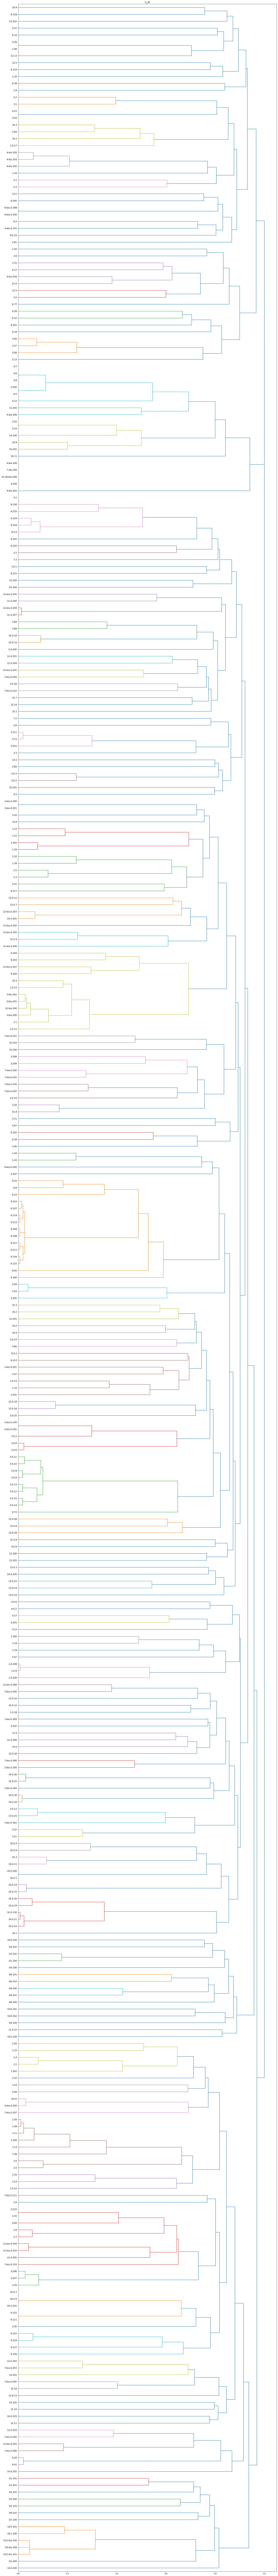

In [11]:
plt.figure(figsize=(25, 250))
plt.title('Z_all')
dendrogram(
    Z_all,
    labels=labels,
    orientation='right',
    leaf_font_size=12.,
)
plt.show()

In [12]:
import json
nameFile = "EmendamentiFinanza.json"
#print(first_amendments)
data_str = json.dumps(first_amendments, default=lambda x: list(x) if isinstance(x, set) else x)
# Writing to sample.json

with open(nameFile, "w") as outfile:
    outfile.write(data_str)

In [13]:
distances = [jaccard_distance(x, y) for x, y in combinations(amendments, 2)]

In [14]:
Z_all = linkage(distances, method='complete')

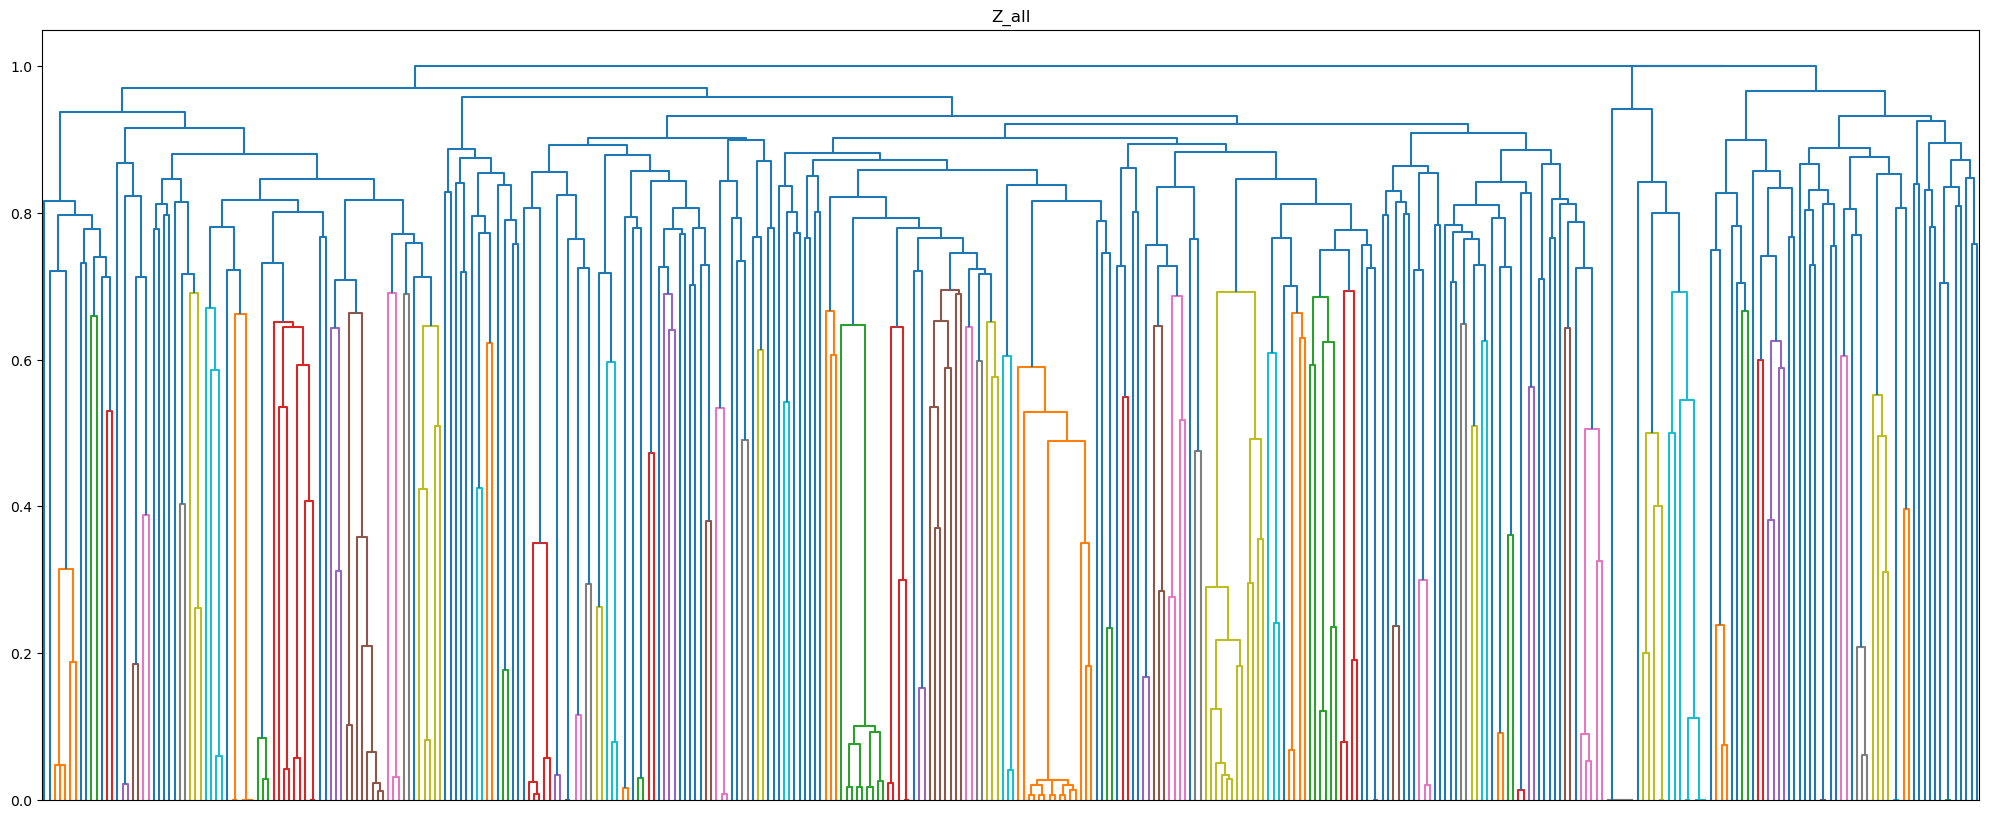

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Z_all')
dendrogram(
    Z_all,
    no_labels=True,
)
plt.savefig('images/figuraFinanza.png') 
plt.show()
plt.close()